# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
import import_ipynb
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

import Utility
from Utility import *

importing Jupyter notebook from Utility.ipynb


 ## Read Music Data

In [2]:
tracks = pd.read_csv(r"datasets/data.csv")

## Content-based Filtering Song Recommendation


Content-based filtering uses similarities in products, services, or content features, as well as information accumulated about the user to make recommendations. In our case we have created a recommendation system which recommends songs based on similar songs.
Music Recommender based on different KMeans and PCA algorithm

1. **PCA_algorithm**: to reduce the dimensionality (in our case number of components is 2) within a dataset while still retaining as much information as possible.

2. **KMeans_with_PCA_algorithm**: algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping clusters. 
    Based on the values of the Within Cluster Sum of Squares (WCSS) and an approach known as the Elbow method, we made a decision about how many clusters we’d like to keep.In our case, we have kept number of cluster as 3.

3. we have then created a new data frame df_segm_pca_kmeans. It allows us to add in the values of the separate components to our segmentation data set. The components’ scores are stored in the ‘scores P C A’ variable. Let’s label them com1 and com2.

4. **filter_based_on_segment**: filters songs that belong to particulat cluster segment.

5. **filter_based_on_cluster_centroid**: filters songs based on closet distance of song and centroid


In [3]:
def recommend_songs(song_id, n_songs=10):
  
    """
    Recommends songs based on a list of previous songs that a user has listened to.
    """
    song_embedding = PCA_algorithm(tracks)
    
    kmeans_pca , centroids = KMeans_with_PCA_algorithm(song_embedding,3)

    #get Segment K-means PCA from song_id argument
    df_segm_pca_kmeans = pd.concat([tracks.reset_index(drop=True), pd.DataFrame(song_embedding)],axis=1)
    df_segm_pca_kmeans.columns.values[-2:] = ['com1','com2']
    df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

    #get segment value of song_id
    segment_val = df_segm_pca_kmeans[df_segm_pca_kmeans['id'] == song_id]['Segment K-means PCA'].values[0]
    
    filtered_data_per_segment = filter_based_on_segment(df_segm_pca_kmeans,segment_val,'id', 'name')   

    rec_songs = filter_based_on_cluster_centroid(kmeans_pca,filtered_data_per_segment,segment_val,tracks)

    #recommend top n songs
    return rec_songs.head(n_songs)['name'].tolist()

Finds similar songs based on the selected song using its song_id 
Recommends Top N song(s). In  our case, we have recommended top 10 songs

In [4]:
recommend_songs_list = recommend_songs("3w3cxwYuR7ThpE8KVSys5x")
recommend_songs_list

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


['The Sentimental Touch',
 "Beulah's Boogie",
 'Stew Ball',
 'Was I Wazir?',
 'Sonora Querida',
 'Opening Act II: Sports of Gay Chicago',
 'My Little Her and Him',
 'Hava Nagila (Sung in Hungarian)',
 'Pravazhanye (Parting)',
 'Nanu Paalimpaga']

In [5]:
#!pip install circlify

## Circle graph to show recommeded songs

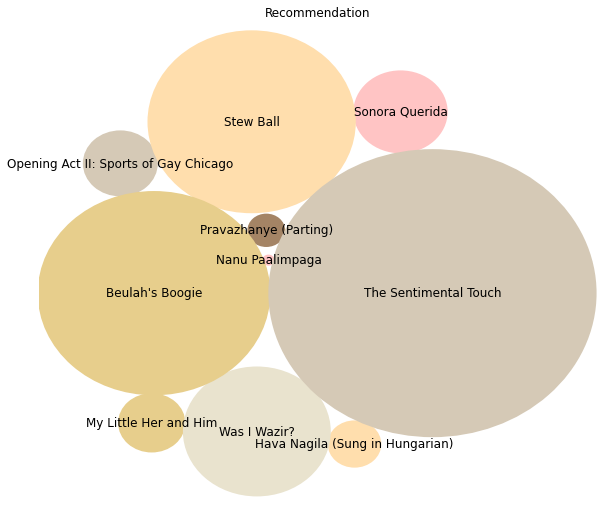

In [6]:
circlify_vizualization(recommend_songs_list)

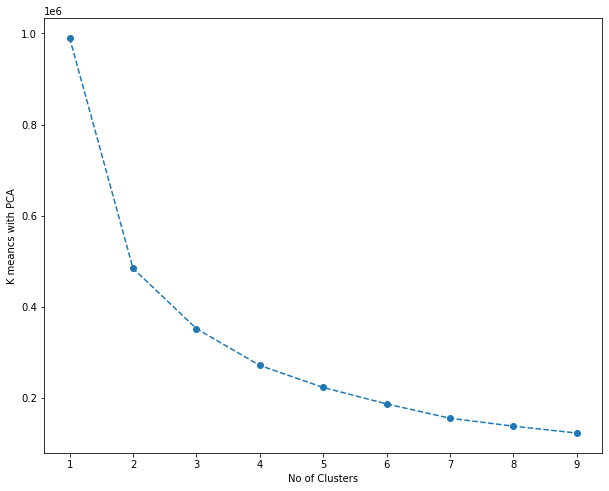

In [7]:
Kmeans_Elbow_visualize(tracks)

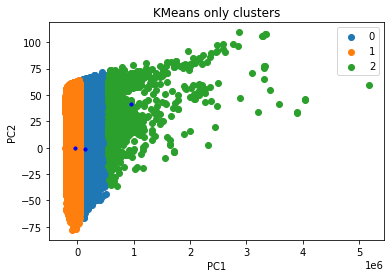

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


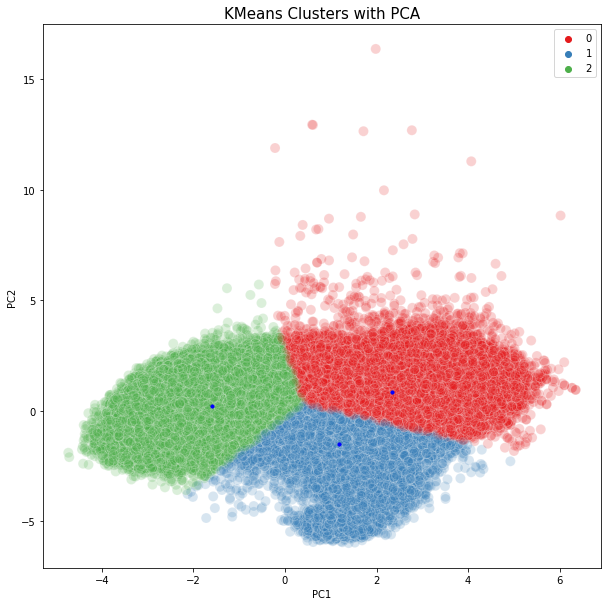

In [8]:
number_fields = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'popularity']
clusters_visualization_kmeans_only(tracks, number_fields, 3)

clusters_visualization_kmeans_with_pca(tracks, 3)